In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

inspired by https://github.com/benmoseley/harmonic-oscillator-pinn/blob/main/Harmonic%20oscillator%20PINN.ipynb and
https://github.com/nanditadoloi/PINN/blob/main/solve_PDE_NN.ipynb and https://towardsdatascience.com/solving-differential-equations-with-neural-networks-afdcf7b8bcc4

In [8]:
def oscillator(d, w0, x):
    """Defines the analytical solution to the 1D underdamped harmonic oscillator problem. 
    Equations taken from: https://beltoforion.de/en/harmonic_oscillator/"""
    assert d < w0
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)
    y  = exp*2*A*cos
    return y

In [9]:
np.sqrt(800)

28.284271247461902

torch.Size([500, 1]) torch.Size([500, 1])
torch.Size([10, 1]) torch.Size([10, 1])


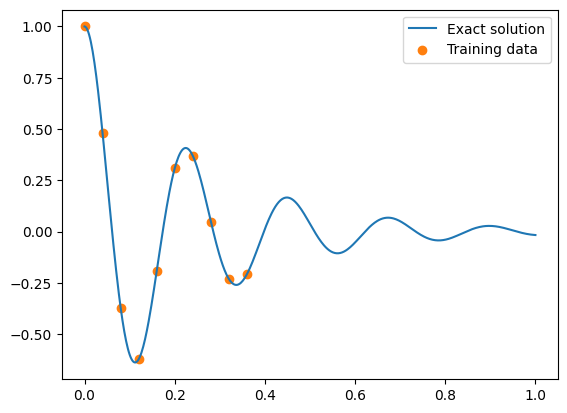

In [10]:
d, w0 = 4, np.sqrt(800)

# get the analytical solution over the full domain
x = torch.linspace(0,1,500).view(-1,1)
y = oscillator(d, w0, x).view(-1,1)
print(x.shape, y.shape)

# slice out a small number of points from the LHS of the domain
x_data = x[0:200:20]
y_data = y[0:200:20]
print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()

In [11]:
class FullyConnected(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_outputs):
    super().__init__()
    self.input = nn.Sequential(
      nn.Linear(n_inputs, n_hidden),
      nn.Tanh(),
    )
    
    self.hidden = nn.Sequential(
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
    )

    self.output = nn.Sequential(
    nn.Linear(n_hidden, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_outputs),
    )

  def forward(self, x):
    x = self.input(x)
    x = self.hidden(x)
    x = self.output(x)
    return x


In [12]:
d = 4
w0 = np.sqrt(800)

# get the analytical solution over the full domain
xs = torch.linspace(0, 1, 500).view(-1,1)
ys = oscillator(d, w0, xs).view(-1,1)

# slice out a small number of points from the LHS of the domain
xs_training = x[0:200:20]
ys_training = y[0:200:20]

tensor(0.0004, grad_fn=<MeanBackward0>) tensor(238.3305, grad_fn=<MeanBackward0>) tensor(0.0011, grad_fn=<MeanBackward0>)


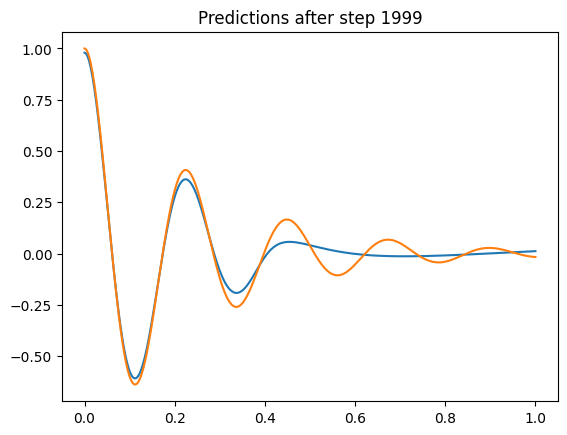

tensor(0.0001, grad_fn=<MeanBackward0>) tensor(116.6826, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MeanBackward0>)


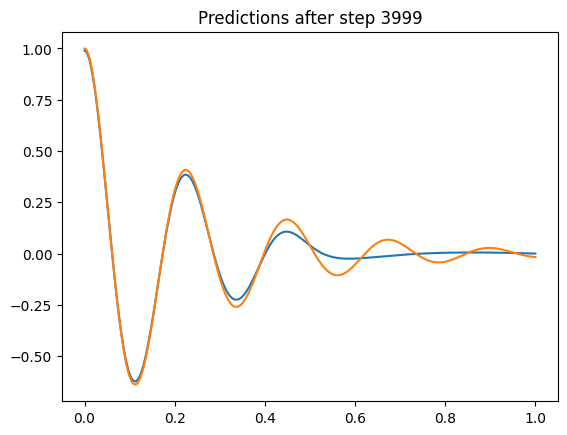

tensor(4.7861e-05, grad_fn=<MeanBackward0>) tensor(89.7831, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)


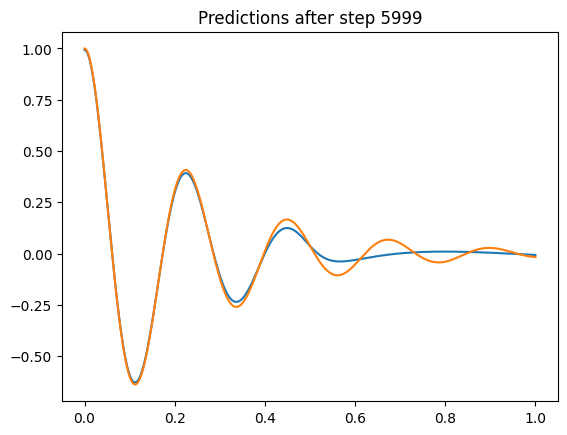

tensor(1.0709e-05, grad_fn=<MeanBackward0>) tensor(273.8481, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MeanBackward0>)


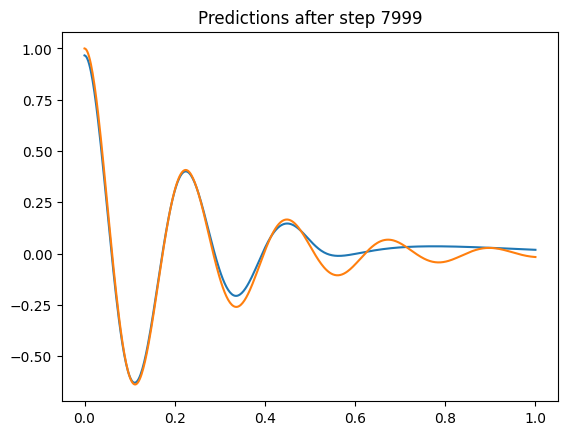

tensor(6.3511e-05, grad_fn=<MeanBackward0>) tensor(76.3192, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)


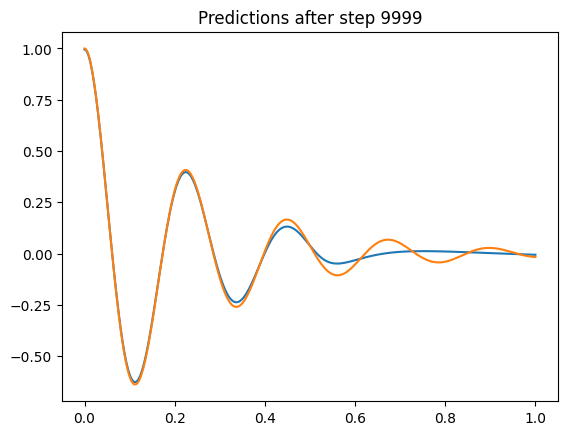

tensor(1.2633e-05, grad_fn=<MeanBackward0>) tensor(46.9487, grad_fn=<MeanBackward0>) tensor(3.7311e-05, grad_fn=<MeanBackward0>)


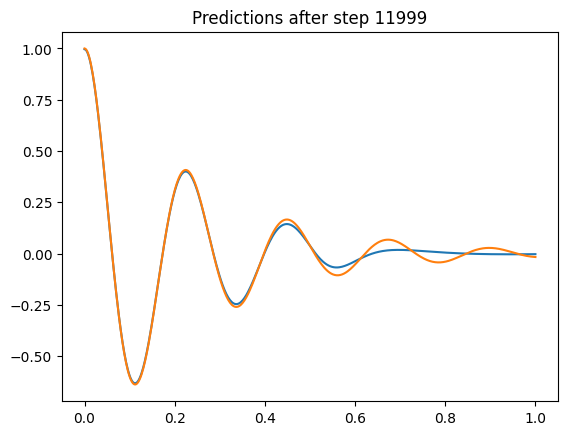

tensor(6.3650e-07, grad_fn=<MeanBackward0>) tensor(26.3817, grad_fn=<MeanBackward0>) tensor(2.4145e-05, grad_fn=<MeanBackward0>)


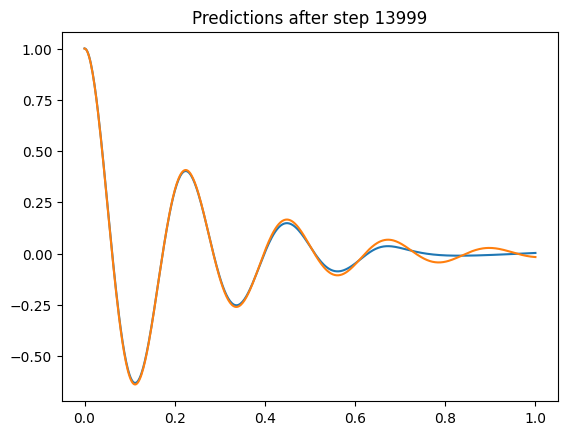

tensor(0.0002, grad_fn=<MeanBackward0>) tensor(194.2047, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MeanBackward0>)


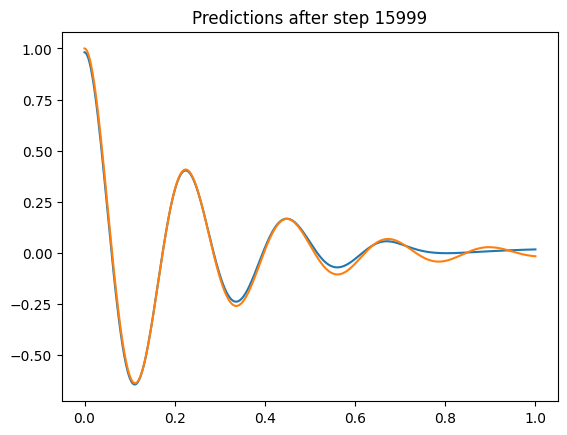

tensor(2.5245e-05, grad_fn=<MeanBackward0>) tensor(36.2645, grad_fn=<MeanBackward0>) tensor(2.8401e-05, grad_fn=<MeanBackward0>)


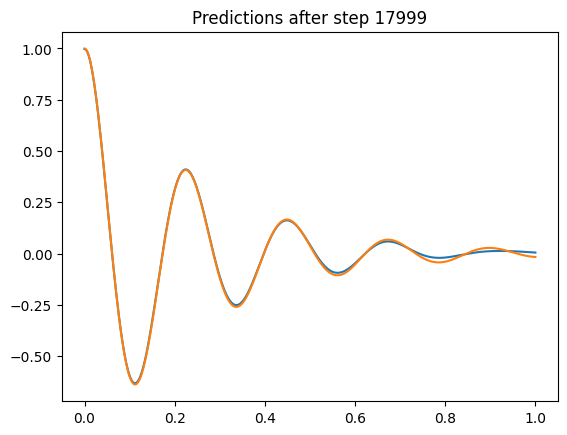

tensor(2.5773e-06, grad_fn=<MeanBackward0>) tensor(4.8780, grad_fn=<MeanBackward0>) tensor(1.8906e-06, grad_fn=<MeanBackward0>)


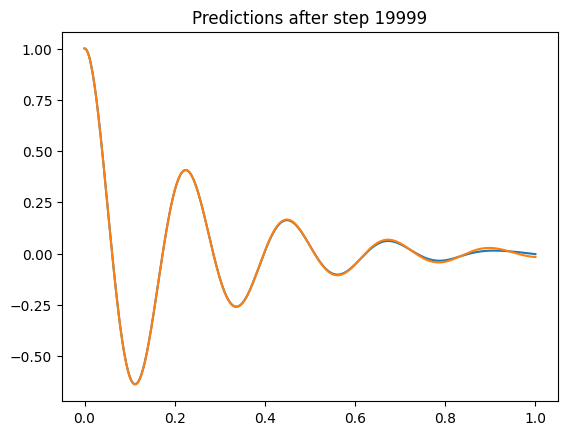

tensor(5.8879e-08, grad_fn=<MeanBackward0>) tensor(4.3052, grad_fn=<MeanBackward0>) tensor(6.2939e-07, grad_fn=<MeanBackward0>)


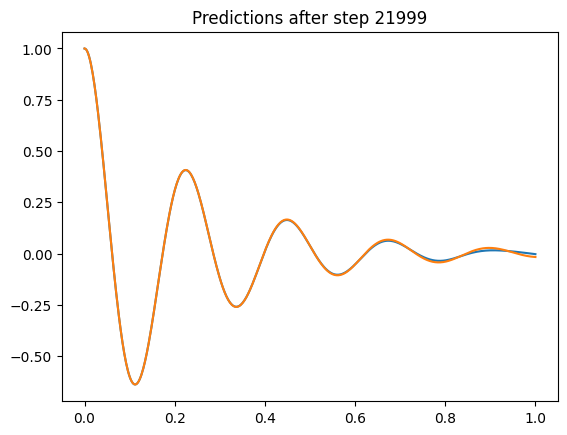

tensor(0.0001, grad_fn=<MeanBackward0>) tensor(54.0659, grad_fn=<MeanBackward0>) tensor(9.6244e-05, grad_fn=<MeanBackward0>)


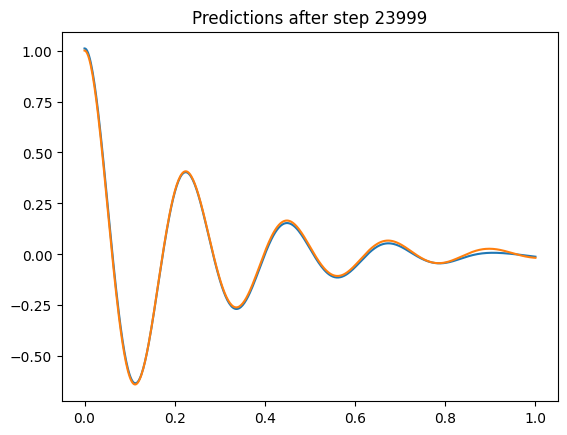

tensor(8.8960e-08, grad_fn=<MeanBackward0>) tensor(4.0284, grad_fn=<MeanBackward0>) tensor(4.4369e-07, grad_fn=<MeanBackward0>)


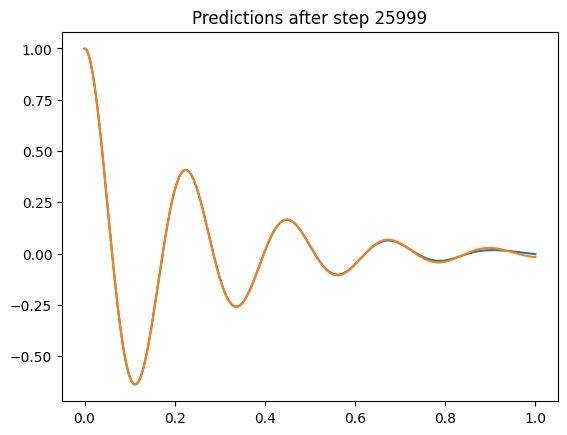

tensor(1.1916e-06, grad_fn=<MeanBackward0>) tensor(4.9828, grad_fn=<MeanBackward0>) tensor(1.2190e-06, grad_fn=<MeanBackward0>)


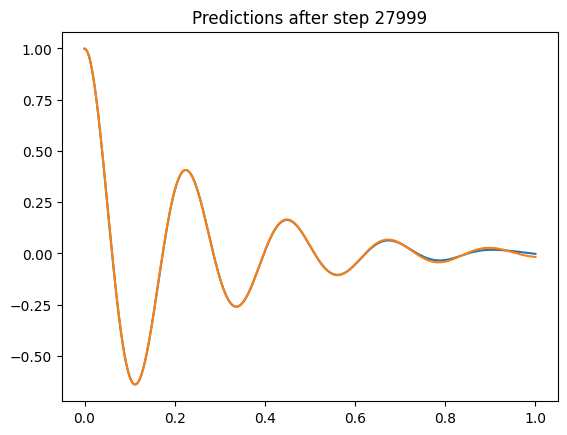

tensor(9.3952e-07, grad_fn=<MeanBackward0>) tensor(3.7223, grad_fn=<MeanBackward0>) tensor(4.7112e-07, grad_fn=<MeanBackward0>)


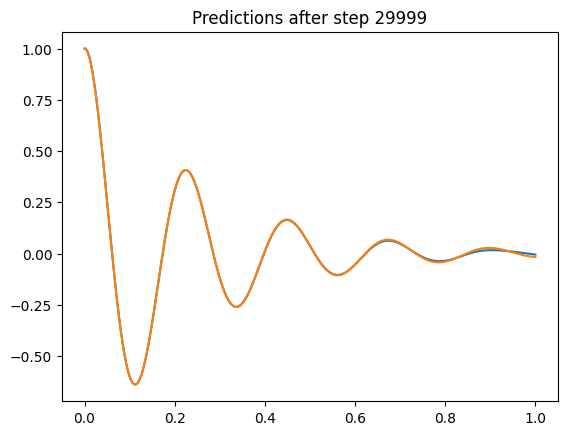

tensor(2.1753e-05, grad_fn=<MeanBackward0>) tensor(10.6867, grad_fn=<MeanBackward0>) tensor(1.6124e-05, grad_fn=<MeanBackward0>)


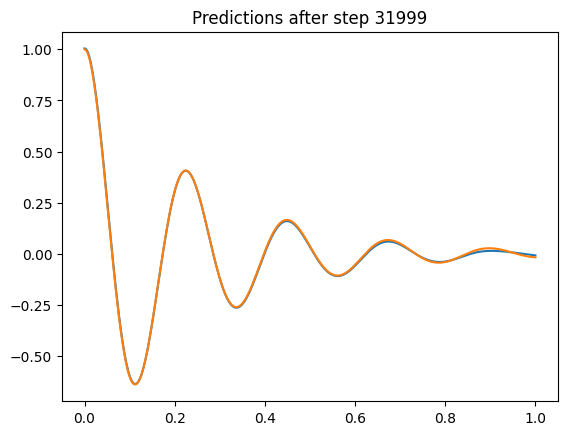

tensor(9.8052e-07, grad_fn=<MeanBackward0>) tensor(3.3063, grad_fn=<MeanBackward0>) tensor(5.7512e-07, grad_fn=<MeanBackward0>)


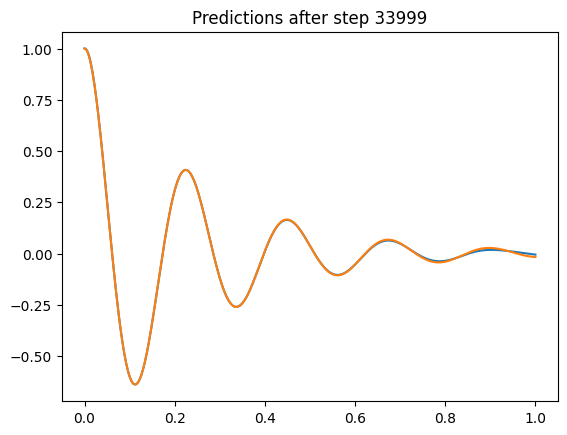

tensor(4.9376e-08, grad_fn=<MeanBackward0>) tensor(3.1505, grad_fn=<MeanBackward0>) tensor(3.7149e-07, grad_fn=<MeanBackward0>)


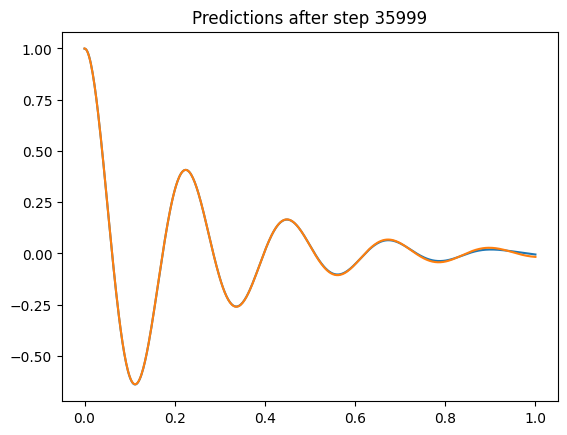

tensor(5.9504e-05, grad_fn=<MeanBackward0>) tensor(29.0524, grad_fn=<MeanBackward0>) tensor(5.6153e-05, grad_fn=<MeanBackward0>)


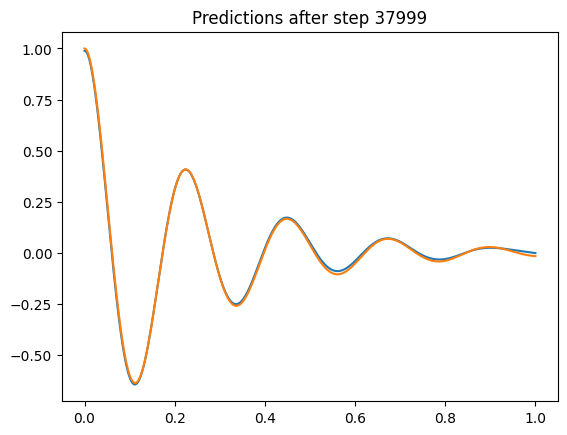

tensor(3.4637e-07, grad_fn=<MeanBackward0>) tensor(4.6147, grad_fn=<MeanBackward0>) tensor(9.8991e-07, grad_fn=<MeanBackward0>)


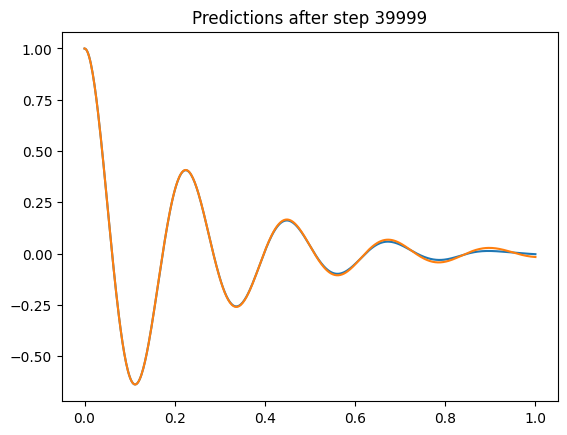

tensor(2.4877e-07, grad_fn=<MeanBackward0>) tensor(2.1850, grad_fn=<MeanBackward0>) tensor(8.9770e-07, grad_fn=<MeanBackward0>)


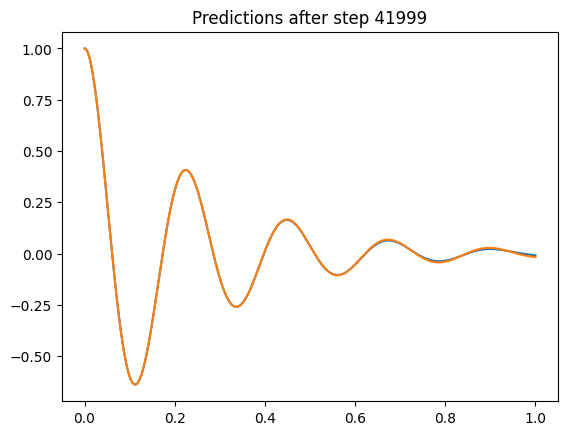

tensor(1.0470e-06, grad_fn=<MeanBackward0>) tensor(4.7180, grad_fn=<MeanBackward0>) tensor(2.5812e-06, grad_fn=<MeanBackward0>)


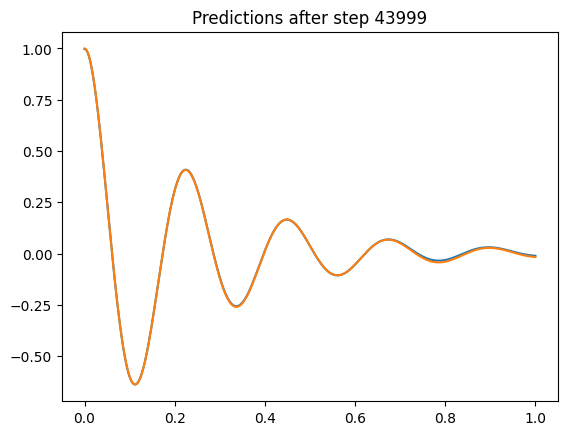

tensor(5.5039e-08, grad_fn=<MeanBackward0>) tensor(0.4579, grad_fn=<MeanBackward0>) tensor(2.3486e-07, grad_fn=<MeanBackward0>)


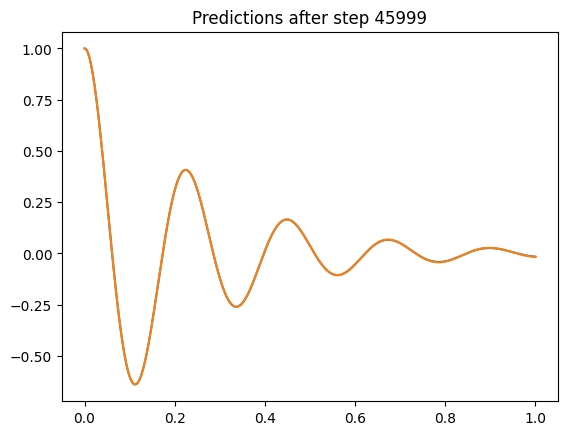

tensor(1.4140e-06, grad_fn=<MeanBackward0>) tensor(0.7618, grad_fn=<MeanBackward0>) tensor(2.1979e-06, grad_fn=<MeanBackward0>)


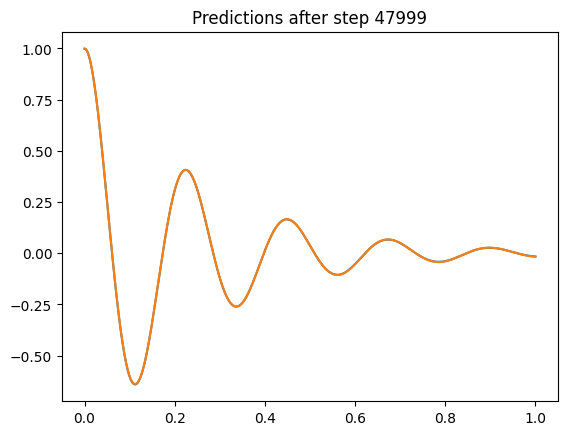

tensor(5.1031e-07, grad_fn=<MeanBackward0>) tensor(0.5887, grad_fn=<MeanBackward0>) tensor(6.2798e-07, grad_fn=<MeanBackward0>)


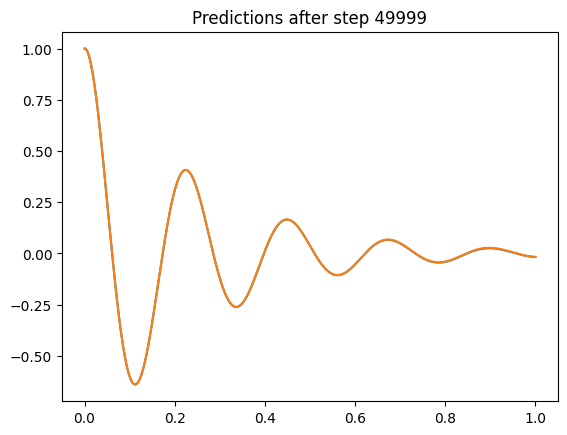

KeyboardInterrupt: 

In [13]:
physics_xs = torch.linspace(0, 1, 50).view(-1, 1).requires_grad_(True)

data_x = xs_training
data_y = ys_training

mu, k = 2*d, w0**2

torch.manual_seed(123)
model = FullyConnected(1, 64, 1)
optimizer2 = torch.optim.Adam(model.parameters(), lr=1e-3)#, weight_decay=1e-4)
scheduler = StepLR(optimizer2, step_size=10000, gamma=0.9)

for i in range(200000):
  optimizer2.zero_grad()

  # data loss
  pred_y = model(data_x)
  data_loss = torch.mean((pred_y - data_y) ** 2) # Mean squared error

  # physics loss
  physics_pred_y = model(physics_xs)
  dx = torch.autograd.grad(physics_pred_y, physics_xs, torch.ones_like(physics_pred_y), create_graph=True)[0]
  dx2 = torch.autograd.grad(dx, physics_xs, torch.ones_like(dx), create_graph=True)[0]
  residual = dx2 + mu * dx + k * physics_pred_y

  physics_loss = torch.mean(residual**2)

  # boundary conditions loss
  t_boundary = torch.zeros(1, requires_grad=True) # torch.tensor([0])
  x_boundary = torch.ones(1, requires_grad=True) #torch.tensor([1])
  # dx_boundary = torch.zeros(1, requires_grad=True) #torch.tensor([0])
  x0_predicted = model(t_boundary)
  dx_predicted = torch.autograd.grad(x0_predicted, t_boundary, torch.ones_like(t_boundary), create_graph=True)[0]
  residual_x0 = x0_predicted - x_boundary
  # residual_dx = dx_predicted
  boundary_loss = torch.mean(residual_x0 ** 2) #+ torch.mean(residual_dx ** 2)

  # boundary_conditions_loss =

  loss = boundary_loss + (1e-4) * physics_loss + data_loss #data_loss + (1e-6)*physics_loss
  loss.backward()
  optimizer2.step()
  scheduler.step()

  if (i+1) % 2000 == 0:
    detached_t = physics_xs.detach()
    print(boundary_loss, physics_loss, data_loss)
    pred_ys = model(x).detach()
    plt.plot(x, pred_ys)
    plt.plot(x, y)
    # plt.scatter(detached_t, torch.zeros_like(detached_t))
    #plt.scatter(short_input_time, short_output_displacement)
    plt.title('Predictions after step '+str(i))
    plt.show()
